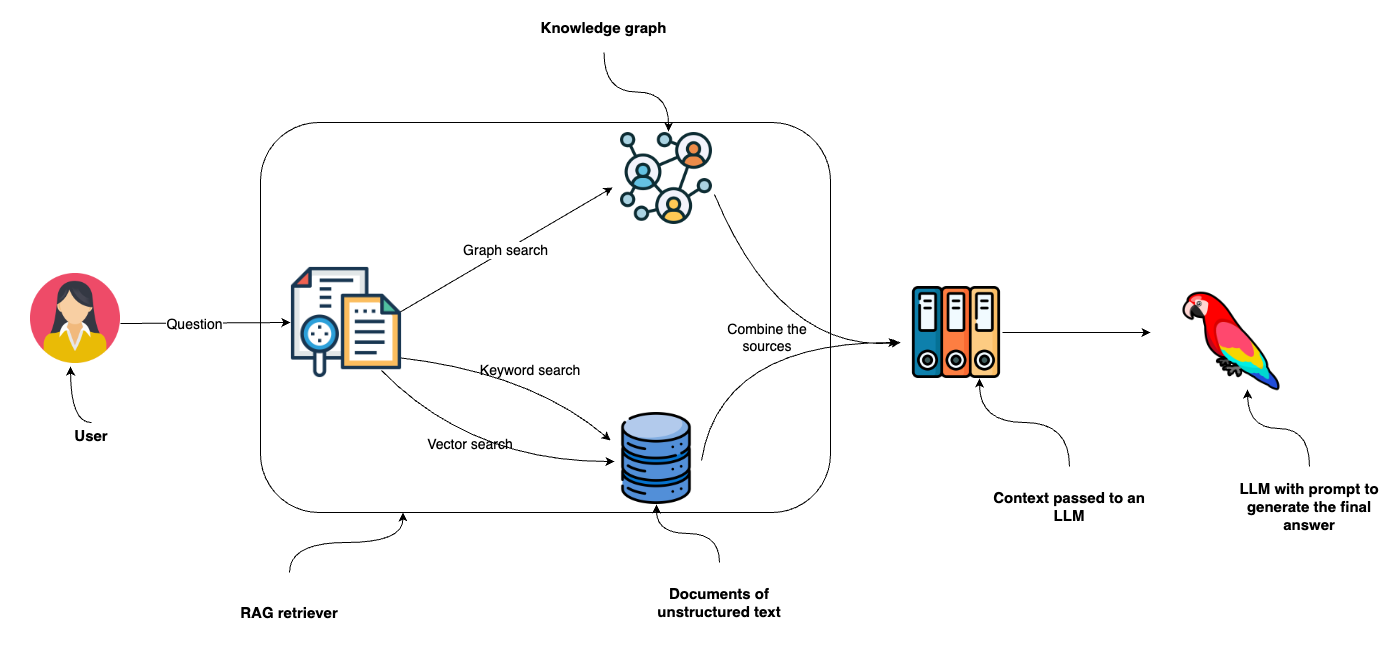

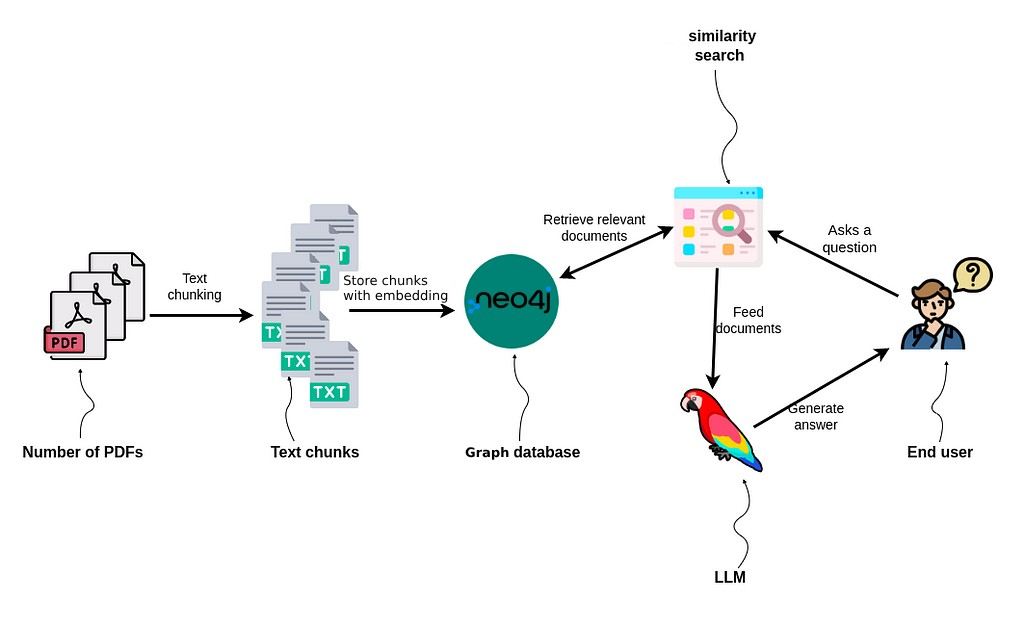

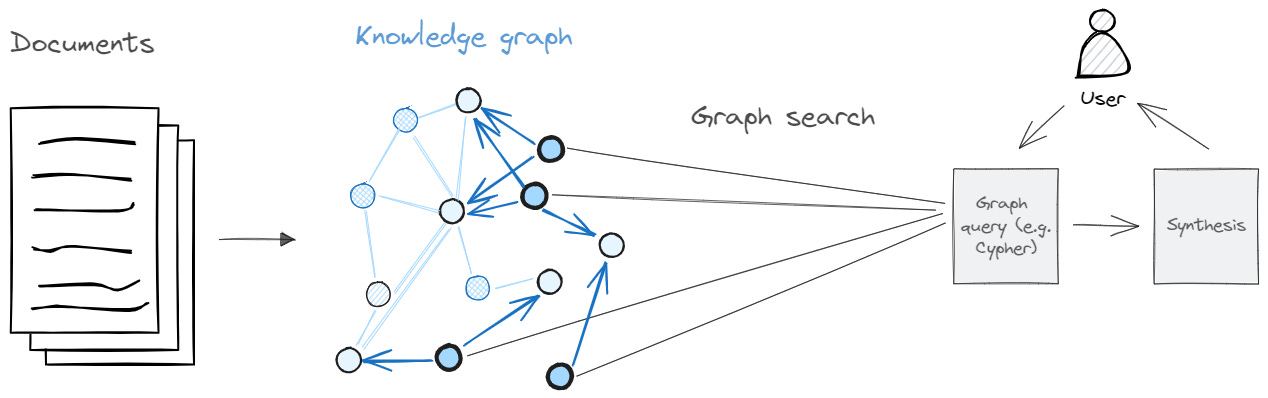

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

neo4j_uri = os.getenv("NEO4J_URI")
os.environ["NEO4J_URI"] = neo4j_uri
neo4j_user = os.getenv("NEO4J_USER_ID")
os.environ["NEO4J_USERNAME"] = neo4j_user
neo4j_password = os.getenv("NEO4J_PASSWORD")
os.environ["NEO4J_PASSWORD"] = neo4j_password
neo4j_instance_name = os.getenv("NEO4J_INSTANCE_NAME")
neo4j_instance_id = os.getenv("NEO4J_INSTANCE_ID")

google_api_key = os.getenv("GEMINI_API_KEY")
os.environ["GOOGLE_API_KEY"] = google_api_key

langchain_api_key = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = langchain_api_key


In [2]:

from langchain_core.runnables import (
    RunnableBranch,
    RunnableLambda,
    RunnableParallel,
    RunnablePassthrough,
)

In [3]:

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate

In [4]:
from typing import Tuple, List, Optional

In [5]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser

In [6]:
from langchain_core.runnables import ConfigurableField

In [7]:
from yfiles_jupyter_graphs import GraphWidget
from neo4j import GraphDatabase

In [8]:
from langchain_community.vectorstores import Neo4jVector

In [9]:

from langchain_community.graphs import Neo4jGraph

In [10]:
graph = Neo4jGraph()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15760\267675202.py:1: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph()


In [11]:
from langchain.document_loaders import WikipediaLoader
raw_documents = WikipediaLoader(query="Elon Musk").load()

d:\a27_YEARS_OLD\multimodal_rag\venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\a27_YEARS_OLD\multimodal_rag\venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [12]:
len(raw_documents)

24

In [13]:
raw_documents[:3]

[Document(metadata={'title': 'Elon Musk', 'summary': "Elon Reeve Musk (; born June 28, 1971) is a businessman known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. He is also known for his ownership of X Corp. (the company that operates the social media platform X, formerly Twitter), and his role in the founding of the Boring Company, xAI, Neuralink, and OpenAI. Musk is the wealthiest individual in the world; as of January 2025, Forbes estimates his net worth to be US$421 billion.\nA member of the wealthy South African Musk family, Musk was born in Pretoria and briefly attended the University of Pretoria. At the age of 18 he immigrated to Canada, acquiring its citizenship through his Canadian-born mother, Maye. Two years later, he matriculated at Queen's University in Canada. Musk later transferred to the University of Pennsylvania and received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University 

create chunks

In [14]:

from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=512, chunk_overlap=24)
documents = text_splitter.split_documents(raw_documents[:3])

In [15]:
documents

[Document(metadata={'title': 'Elon Musk', 'summary': "Elon Reeve Musk (; born June 28, 1971) is a businessman known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. He is also known for his ownership of X Corp. (the company that operates the social media platform X, formerly Twitter), and his role in the founding of the Boring Company, xAI, Neuralink, and OpenAI. Musk is the wealthiest individual in the world; as of January 2025, Forbes estimates his net worth to be US$421 billion.\nA member of the wealthy South African Musk family, Musk was born in Pretoria and briefly attended the University of Pretoria. At the age of 18 he immigrated to Canada, acquiring its citizenship through his Canadian-born mother, Maye. Two years later, he matriculated at Queen's University in Canada. Musk later transferred to the University of Pennsylvania and received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University 

In [21]:
# from langchain_google_genai import ChatGoogleGenerativeAI
# llm=ChatGoogleGenerativeAI(model='gemini-1.5-pro')

In [16]:
from langchain_groq import ChatGroq

In [17]:
import os
from dotenv import load_dotenv
load_dotenv()
GROQ_API_KEY = os.getenv('GROQ_API_KEY')
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

In [18]:
llm = ChatGroq(
    model="llama-3.1-70b-Versatile",
    temperature=0,
    # max_tokens=None,
    # timeout=None,
    # max_retries=2,
    # # other params...
)

graph transformer

In [19]:

from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer(llm=llm)

convert document to graph document

In [ ]:
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [30]:
graph_documents

[GraphDocument(nodes=[Node(id='Elon Musk', type='Person', properties={}), Node(id='Spacex', type='Company', properties={}), Node(id='Tesla, Inc.', type='Company', properties={}), Node(id='X Corp.', type='Company', properties={}), Node(id='The Boring Company', type='Company', properties={}), Node(id='Xai', type='Company', properties={}), Node(id='Neuralink', type='Company', properties={}), Node(id='Openai', type='Company', properties={}), Node(id='Maye Musk', type='Person', properties={}), Node(id='Kimbal Musk', type='Person', properties={}), Node(id='University Of Pretoria', type='University', properties={}), Node(id="Queen'S University", type='University', properties={}), Node(id='University Of Pennsylvania', type='University', properties={}), Node(id='Stanford University', type='University', properties={}), Node(id='Compaq', type='Company', properties={}), Node(id='X.Com', type='Company', properties={}), Node(id='Confinity', type='Company', properties={}), Node(id='Paypal', type='Com

In [23]:
graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
)

In [22]:
# directly show the graph resulting from the given Cypher query
default_cypher = "MATCH (s)-[r:!MENTIONS]->(t) RETURN s,r,t LIMIT 50"

In [ ]:

# This is a Cypher query, which is a query language used for graph databases like Neo4j.
# Query Breakdown:
# MATCH (s)-[r:!MENTIONS]->(t): This line matches a pattern in the graph where:
# (s) is the start node.
# - represents a relationship between nodes.
# [r:!MENTIONS] is the relationship, where r is the relationship variable and !MENTIONS specifies that the relationship should NOT be of type MENTIONS.
# -> indicates the direction of the relationship (from start node to end node).
# (t) is the end node.
# RETURN s,r,t: This line returns the matched start node (s), relationship (r), and end node (t).
# LIMIT 50: This line limits the number of returned results to 50.

In [24]:
from yfiles_jupyter_graphs import GraphWidget
from neo4j import GraphDatabase

In [25]:
def showGraph(cypher: str = default_cypher):
    # create a neo4j session to run queries
    driver = GraphDatabase.driver(
        uri = neo4j_uri,
        auth = (neo4j_user,
                neo4j_password))
    session = driver.session()
    widget = GraphWidget(graph = session.run(cypher).graph())
    widget.node_label_mapping = 'id'
    display(widget)
    return widget

In [ ]:

# This is a Python function named showGraph that displays a graph visualization using the Neo4j Graph Database and the GraphWidget from the neo4j library.
# Function Parameters:
# cypher: A string representing the Cypher query to execute. Defaults to default_cypher if not provided.
# Function Behavior:
# Establishes a connection to the Neo4j database using the provided neo4j_uri, neo4j_user, and neo4j_password.
# Creates a new session to execute queries.
# Runs the provided Cypher query using the session.run() method and retrieves the resulting graph.
# Creates a GraphWidget instance to display the graph.
# Configures the node label mapping to use the 'id' property.
# Displays the graph widget using the display() function.
# Returns the GraphWidget instance.

In [26]:

showGraph()

GraphWidget(layout=Layout(height='800px', width='100%'))

GraphWidget(layout=Layout(height='800px', width='100%'))

In [27]:
from typing import Tuple, List, Optional

In [28]:
from langchain_community.vectorstores import Neo4jVector

neo4j database information:

Nodes -contained entities

relationships -contained  relations between nodes in the graph widget 

Propertiy keys - attribute information associated with nodes and relationships

In [29]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
vector_index = Neo4jVector.from_existing_graph(
    GoogleGenerativeAIEmbeddings(model='models/embedding-001'),
    search_type="hybrid",
    node_label="Document",
    text_node_properties=["text"],  # from the text node properties 
    embedding_node_property="embedding"  # get the embedding node properties of text properties
)

In [ ]:
# This code snippet creates a vector index in a Neo4j graph database using the langchain_google_genai library and the Neo4jVector class.
# Key Components:
# GoogleGenerativeAIEmbeddings: This class generates embeddings using Google's Generative AI models.
# Neo4jVector.from_existing_graph: This method creates a vector index from an existing Neo4j graph.
# model='models/embedding-001': Specifies the embedding model to use.
# search_type="hybrid": Configures the search type for the vector index.
# node_label="Document": Specifies the node label for the documents in the graph.
# text_node_properties=["text"]: Specifies the text property of the nodes.
# embedding_node_property="embedding": Specifies the property where the embeddings are stored.
# Purpose:
# This code enables efficient similarity searches and semantic querying in the Neo4j graph database using vector embeddings generated by Google's Generative AI models.

In [32]:
graph.query("CREATE FULLTEXT INDEX entity IF NOT EXISTS FOR (e:__Entity__) ON EACH [e.id]")

[]

In [ ]:

# This Cypher query creates a full-text index in a Neo4j graph database.
# Breakdown:
# CREATE FULLTEXT INDEX: Creates a new full-text index.
# entity: Specifies the name of the index.
# IF NOT EXISTS: Ensures the index is only created if it doesn't already exist.
# FOR (e:__Entity__): Specifies the nodes to include in the index, in this case, nodes labeled __Entity__.
# ON EACH [e.id]: Specifies the property to index, in this case, the id property of each __Entity__ node.
# Purpose:
# This query enables efficient full-text searching on the id property of __Entity__ nodes in the graph database.

In [33]:

from langchain_core.pydantic_v1 import BaseModel, Field
# Extract entities from text
class Entities(BaseModel):
    """Identifying information about entities."""

    names: List[str] = Field(
        ...,
        description="All the person, organization, or business entities that "
        "appear in the text",
    )

d:\a27_YEARS_OLD\multimodal_rag\venv\Lib\site-packages\IPython\core\interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# This code defines a class Entities using the BaseModel from the Pydantic library.
# Key Components:
# Entities: The name of the class, representing a collection of entities.
# BaseModel: The base class from Pydantic, providing automatic data validation and parsing.
# names: A field within the class, representing a list of names of entities.
# List[str]: The type hint for the names field, indicating it's a list of strings.
# Field(...): A Pydantic field with ellipsis (...), indicating that this field is required.
# description: A docstring providing a description of the names field.
# Purpose:
# This class is likely part of a larger data model, used to represent and validate data related to entities mentioned in text. The names field specifically stores a list of names associated with these entities.

In [30]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate

In [31]:

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are extracting organization and person entities from the text.",
        ),
        (
            "human",
            "Use the given format to extract information from the following "
            "input: {question}",
        ),
    ]
)

In [34]:
entity_chain = prompt | llm.with_structured_output(Entities) # query the entity

In [36]:
entity_chain.invoke({"question": "Where was Elon Musk born?"})

Entities(names=['Elon Musk'])

In [37]:

from langchain_community.vectorstores.neo4j_vector import remove_lucene_chars

create text queries 

In [38]:
def generate_full_text_query(input: str) -> str:
    full_text_query = ""
    words = [el for el in remove_lucene_chars(input).split() if el]
    for word in words[:-1]:
        full_text_query += f" {word}~2 AND"
    full_text_query += f" {words[-1]}~2"
    return full_text_query.strip()

In [ ]:
# This function generates a full-text query string from a given input string.
# Key Components:
# remove_lucene_chars(input): A function call to remove special Lucene characters from the input string.
# words = [...]: A list comprehension to split the input string into individual words, excluding empty strings.
# full_text_query: An empty string to build the full-text query.
# for loop: Iterates over each word in the words list, except the last one.
# full_text_query += f" {word}~2 AND": Appends each word to the query string with a fuzzy search operator (~2) and an AND operator.
# full_text_query += f" {words[-1]}~2": Appends the last word to the query string with a fuzzy search operator (~2).
# return full_text_query.strip(): Returns the generated full-text query string, removing leading and trailing whitespace.
# Purpose:

In [39]:
query_test = "who is Elon Musk ?"

In [40]:
result = ""

In [41]:
entities = entity_chain.invoke({"question": query_test})

In [42]:
entities

Entities(names=['Elon Musk'])

In [48]:
entities.names[0]

'Elon Musk'

In [44]:
full_text_query = ""

In [49]:
words =  remove_lucene_chars(entities.names[0]).split() 

In [50]:
words

['Elon', 'Musk']

In [51]:
words = [el for el in remove_lucene_chars(entities.names[0]).split() if el]

In [52]:
words

['Elon', 'Musk']

In [53]:
for word in words[:-1]:
        full_text_query += f" {word}~2 AND"

In [54]:
full_text_query

' Elon~2 AND'

In [55]:
full_text_query += f" {words[-1]}~2"

In [56]:
full_text_query

' Elon~2 AND Musk~2'

In [57]:
full_text_query.strip()

'Elon~2 AND Musk~2'

create neo4j query

In [59]:
response = graph.query(
            """CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})
            YIELD node,score
            CALL {
              WITH node
              MATCH (node)-[r:!MENTIONS]->(neighbor)
              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output
              UNION ALL
              WITH node
              MATCH (node)<-[r:!MENTIONS]-(neighbor)
              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output
            }
            RETURN output LIMIT 50
            """,
            {"query": full_text_query.strip()},
        )

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "


In [ ]:
# This code executes a Cypher query on a Neo4j graph database.
# Query Breakdown:
# Full-text search:
# CALL db.index.fulltext.queryNodes('entity', $query, {limit:2}): Searches for nodes with the label entity that match the full-text query $query, returning up to 2 results.
# YIELD node,score: Returns the matched nodes and their scores.
# Neighborhood query:
# CALL { ... }: Defines an inner query that returns the neighbors of the matched nodes.
# MATCH (node)-[r:!MENTIONS]->(neighbor): Matches outgoing relationships (!MENTIONS) from the node to its neighbors.
# RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output: Returns a string representation of the node, relationship, and neighbor.
# UNION ALL: Combines the results of the outgoing relationships with the results of the incoming relationships.
# MATCH (node)<-[r:!MENTIONS]-(neighbor): Matches incoming relationships (!MENTIONS) to the node from its neighbors.
# Final result:
# RETURN output LIMIT 50: Returns the combined results of the neighborhood query, limited to 50 rows.

In [62]:
response

[{'output': 'Elon Musk - FOUNDER -> Spacex'},
 {'output': 'Elon Musk - FOUNDER -> X Corp.'},
 {'output': 'Elon Musk - FOUNDER -> Xai'},
 {'output': 'Elon Musk - FOUNDER -> X Corp'},
 {'output': 'Elon Musk - CEO -> Spacex'},
 {'output': 'Elon Musk - CEO -> Tesla, Inc.'},
 {'output': 'Elon Musk - CEO -> X Corp.'},
 {'output': 'Elon Musk - CEO -> Tesla'},
 {'output': 'Elon Musk - OWNER -> X Corp.'},
 {'output': 'Elon Musk - OWNER -> Twitter'},
 {'output': 'Elon Musk - OWNER -> Twitter, Inc.'},
 {'output': 'Elon Musk - CO-FOUNDER -> The Boring Company'},
 {'output': 'Elon Musk - CO-FOUNDER -> Xai'},
 {'output': 'Elon Musk - CO-FOUNDER -> Neuralink'},
 {'output': 'Elon Musk - CO-FOUNDER -> Openai'},
 {'output': 'Elon Musk - CHILD -> Maye Musk'},
 {'output': 'Elon Musk - BROTHER -> Kimbal Musk'},
 {'output': 'Elon Musk - ATTENDED -> University Of Pretoria'},
 {'output': "Elon Musk - ATTENDED -> Queen'S University"},
 {'output': 'Elon Musk - ATTENDED -> University Of Pennsylvania'},
 {'output

In [60]:
result += "\n".join([el['output'] for el in response])

In [61]:
result

"Elon Musk - FOUNDER -> Spacex\nElon Musk - FOUNDER -> X Corp.\nElon Musk - FOUNDER -> Xai\nElon Musk - FOUNDER -> X Corp\nElon Musk - CEO -> Spacex\nElon Musk - CEO -> Tesla, Inc.\nElon Musk - CEO -> X Corp.\nElon Musk - CEO -> Tesla\nElon Musk - OWNER -> X Corp.\nElon Musk - OWNER -> Twitter\nElon Musk - OWNER -> Twitter, Inc.\nElon Musk - CO-FOUNDER -> The Boring Company\nElon Musk - CO-FOUNDER -> Xai\nElon Musk - CO-FOUNDER -> Neuralink\nElon Musk - CO-FOUNDER -> Openai\nElon Musk - CHILD -> Maye Musk\nElon Musk - BROTHER -> Kimbal Musk\nElon Musk - ATTENDED -> University Of Pretoria\nElon Musk - ATTENDED -> Queen'S University\nElon Musk - ATTENDED -> University Of Pennsylvania\nElon Musk - DROPPED_OUT -> Stanford University\nElon Musk - SOLD_COMPANY_TO -> Compaq\nElon Musk - CO-FOUNDED -> X.Com\nElon Musk - CO-FOUNDED -> Paypal\nElon Musk - FOUNDED -> Spacex\nElon Musk - FOUNDED -> Solarcity\nElon Musk - INVESTED_IN -> Tesla Motors, Inc.\nElon Musk - SUED_BY -> U.S. Securities And

In [63]:
# Fulltext index query
def structured_retriever(question: str) -> str:
    result = ""
    entities = entity_chain.invoke({"question": question})
    for entity in entities.names:
        response = graph.query(
            """CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})
            YIELD node,score
            CALL {
              WITH node
              MATCH (node)-[r:!MENTIONS]->(neighbor)
              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output
              UNION ALL
              WITH node
              MATCH (node)<-[r:!MENTIONS]-(neighbor)
              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output
            }
            RETURN output LIMIT 50
            """,
            {"query": generate_full_text_query(entity)},
        )
        result += "\n".join([el['output'] for el in response])
    return result

In [64]:
print(structured_retriever("Who is Elon Musk?"))   # horizontal scaling

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "


Elon Musk - FOUNDER -> Spacex
Elon Musk - FOUNDER -> X Corp.
Elon Musk - FOUNDER -> Xai
Elon Musk - FOUNDER -> X Corp
Elon Musk - CEO -> Spacex
Elon Musk - CEO -> Tesla, Inc.
Elon Musk - CEO -> X Corp.
Elon Musk - CEO -> Tesla
Elon Musk - OWNER -> X Corp.
Elon Musk - OWNER -> Twitter
Elon Musk - OWNER -> Twitter, Inc.
Elon Musk - CO-FOUNDER -> The Boring Company
Elon Musk - CO-FOUNDER -> Xai
Elon Musk - CO-FOUNDER -> Neuralink
Elon Musk - CO-FOUNDER -> Openai
Elon Musk - CHILD -> Maye Musk
Elon Musk - BROTHER -> Kimbal Musk
Elon Musk - ATTENDED -> University Of Pretoria
Elon Musk - ATTENDED -> Queen'S University
Elon Musk - ATTENDED -> University Of Pennsylvania
Elon Musk - DROPPED_OUT -> Stanford University
Elon Musk - SOLD_COMPANY_TO -> Compaq
Elon Musk - CO-FOUNDED -> X.Com
Elon Musk - CO-FOUNDED -> Paypal
Elon Musk - FOUNDED -> Spacex
Elon Musk - FOUNDED -> Solarcity
Elon Musk - INVESTED_IN -> Tesla Motors, Inc.
Elon Musk - SUED_BY -> U.S. Securities And Exchange Commission (Sec)
E

repharase the question with chat history

In [65]:
_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question,
in its original language.
Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""

In [66]:
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)

In [79]:
def _format_chat_history(chat_history: List[Tuple[str, str]]) -> List:
    # global buffer
    buffer = []
    for human, ai in chat_history:
        buffer.append(HumanMessage(content=human))
        buffer.append(AIMessage(content=ai))
    return buffer

In [80]:

_search_query = RunnableBranch(
    # If input includes chat_history, we condense it with the follow-up question
    (
        RunnableLambda(lambda x: bool(x.get("chat_history"))).with_config(
            run_name="HasChatHistoryCheck"
        ),  # Condense follow-up question and chat into a standalone_question
        RunnablePassthrough.assign(
            chat_history=lambda x: _format_chat_history(x["chat_history"])
        )
        | CONDENSE_QUESTION_PROMPT
        | ChatGroq(temperature=0)
        | StrOutputParser(),
    ),
    # Else, we have no chat history, so just pass through the question
    RunnableLambda(lambda x : x["question"]),
)

In [ ]:
# Conditional Check:
# RunnableLambda(lambda x: bool(x.get("chat_history"))): A lambda function checks if the input x contains a "chat_history" key.
# True Branch (Has Chat History):
# RunnablePassthrough.assign(...): Assigns a formatted chat_history value to the input.
# _format_chat_history(x["chat_history"]): Formats the chat history (implementation not shown).
# CONDENSE_QUESTION_PROMPT: A pipeline stage that condenses the follow-up question and chat history.
# ChatGroq(temperature=0): A pipeline stage that generates a response using the ChatGroq model.
# StrOutputParser(): A pipeline stage that parses the output as a string.
# False Branch (No Chat History):
# RunnableLambda(lambda x: x["question"]): A lambda function simply returns the input question value.

In [81]:

def retriever(question: str):
    print(f"Search query: {question}")    # Hybrid search
    structured_data = structured_retriever(question) # search from entity nodes
    unstructured_data = [el.page_content for el in vector_index.similarity_search(question)] # search from text embedding nodes
    final_data = f"""Structured data:
                {structured_data}
                Unstructured data:
                {"#Document ". join(unstructured_data)}
    """
    return final_data

In [ ]:
# question: A string representing the question for which relevant data is to be retrieved.
# Functionality:
# Printing the Search Query: The function starts by printing the search query (the question) to the console.
# Retrieving Structured Data: It then calls the structured_retriever function, passing the question as an argument, and stores the result in the structured_data variable.
# Retrieving Unstructured Data: Next, it uses the vector_index.similarity_search method to perform a similarity search based on the question. The results are stored in the unstructured_data variable as a list of page contents.
# Combining Data: The function then combines the structured and unstructured data into a single string, final_data, with clear labels for each type of data.
# Returning the Combined Data: Finally, the function returns the final_data string.

In [82]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
Use natural language and be concise.
Answer:"""
     

In [83]:

prompt = ChatPromptTemplate.from_template(template)

In [84]:

chain = (
    RunnableParallel(
        {
            "context": _search_query | retriever,
            "question": RunnablePassthrough(),
        }
    )
    | prompt
    | llm
    | StrOutputParser()
)

In [85]:
chain.invoke({"question": "Which nation did Elon Musk belong to?"})

Search query: Which nation did Elon Musk belong to?


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNoti

'Elon Musk is a citizen of multiple nations, including South Africa (by birth), Canada (through his mother), and the United States (acquired in 2002).'

In [86]:
chain.invoke(
    {
        "question": "When was he born?"
        
    }
)

Search query: When was he born?


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNoti

'Elon Musk was born on June 28, 1971.'

In [88]:

chain.invoke(
    {
        "question": "When was he born?",
        "chat_history": [("Which nation did Elon Musk belong to?","africa")],
    }
)

Search query: When was Elon Musk born?


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNoti

'Elon Musk was born on June 28, 1971.'